# Support Vector Machine (SVM)

SVM trata de bucar esa separación entre dos clases distintas. Sin embargo, SVM también soporta multiples clases.


Las máquinas de vectores soporte (SVM) son clasificadores no paramétricos basados en funciones discriminantes lineales.

- Son clasificadores dicotómicos, ya que se limitan a discriminar entre 2 clases distintas. No obstante, esto no implica que no se puedan abordar problemas multiclase utilizando este tipo de algoritmo.

- Los clasificadores SVM consisten en hallar un hiperplano óptimo capaz de separar el espacio muestral en dos regiones, de manera que cada regiónpertenezca a una clase.

- Para cada hiperplano se calcula el margen, que se define como la distancia entre los puntos más cercanos de cada clase a ese hiperplano.

- El hiperplano óptimo es aquel que maximiza el margen.

- `A los dos puntos más cercanos de cada clase (los que tocan con el límite del margen) se les llama vectores soporte.`

- De esta manera, quedan definidos un hiperplano positivo y un hiperplano negativo

Como muestran las lineas, se van definiendo multiples hiperplanos, que nos permiten separar las dos clases. SVM busca el hiperplano optimo.

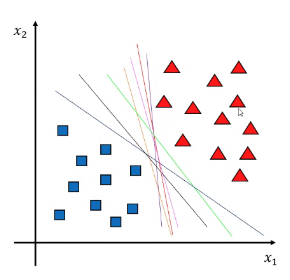

>Note: Para cada Hiperplano calculamos el Margen. El Hiperplano óptimo es aquel donde la distancia a uno punto mas cercano de cada clase es el mayor. A esos dos puntos se los conoce como vectores de soporte.

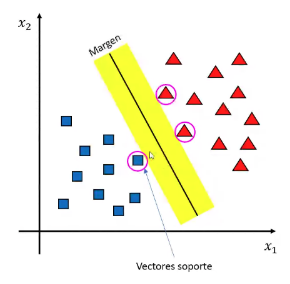

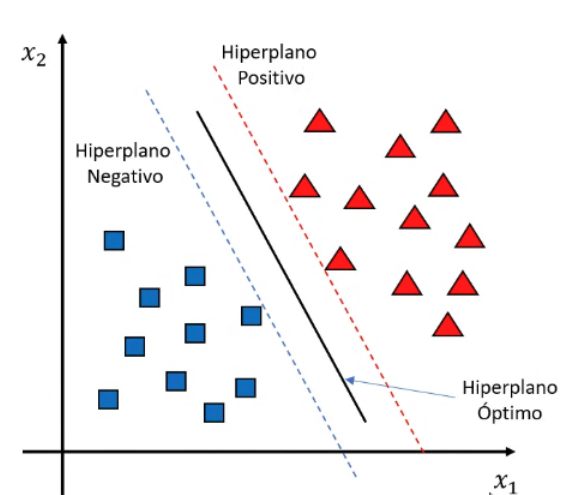

## Holgura

Al introducir la variable de holgura, nos va a permitir incluir mayor margen de errores durante el entrenamiento, por ejemplo, en la imagen debajo, si no introducimos esa variable, al utilizar `Hard Margin`, nos daría que el hiperplano nos quede en esa posición y de caer un punto del lado izquierdo, lo clasificaría como cuadrado azul, cuando en realidad podría ser un triangulo rojo.

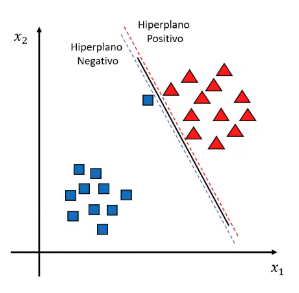


## Datos no linealmente separables

Cuando nos encontramos en un escenario donde los datos no son linealmente separables puede aplicarse el `kernel trick` usando una función kernel (cuadrático, gaussiano, etc).

El `Kernel trick` permite proyectar un espacio muestral D-dimensional a otro espacion M-dimensional.
Esto permite separar de manera lineal aquellos datos que originalmente no eran linealmente separables.

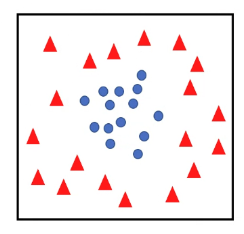


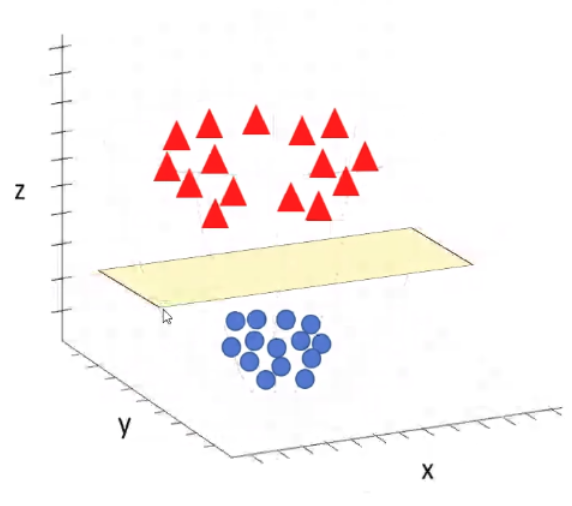


## Ventajas y Desventajas

### Ventajas

- El clasificador SVM utiliza un método de optimización convexa (convex optimization) que garantiza una convergencia a un mínimo global y no a un mínimo local.

- El algoritmo SVM es adecuado tanto para problemas lineales como no lineales usando el kernel trick.

- Modelos basados en SVM funcionan bien independientemente de la dimensionalidad del espacio de características.

- SVM funciona de manera eficaz en conjuntos de datos pequeños, ya que su rendimiento no está supeditado al uso de todos los datos.

### Desventajas

- SVM no es adecuado para conjuntos de datos muy grandes ya que presentan un coste computacional elevado.

- SVM es menos efectivo en conjuntos de datos más ruidosos, cuando existen clases superpuestas.

In [ ]:
import sklearn.metrics as metrics
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, KFold
from sklearn import preprocessing, svm
from evaluacion_funciones import *

In [ ]:
# Carga de datos.
datos = load_iris()
X = datos.data
y = datos.target
print(np.shape(X))

In [ ]:
# Métricas de evaluación.
metricas = {
  'ACC':    metrics.accuracy_score,
  'PREC':   lambda y_true, y_pred:
            metrics.precision_score(y_true, y_pred,
              average='micro'),
  'RECALL': lambda y_true, y_pred:
            metrics.recall_score(y_true, y_pred,
              average='micro'),
  'F1':     lambda y_true, y_pred:
            metrics.f1_score(y_true, y_pred, average='micro')}

In [ ]:
# 1) Partición de datos externa
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.shape(X_training))

In [ ]:
# ------------- TRAINING ---------------- #

In [ ]:
# 2) Extracción de características
# 3) Selección de atributos

In [ ]:
# 4) Estandarización de los datos de entrenamiento
standardizer = preprocessing.StandardScaler()
stdr_trained = standardizer.fit(X_training)
X_stdr = stdr_trained.transform(X_training)
# print(X_stdr)

In [ ]:
# 5) Construcción del algoritmo de aprendizaje.
algoritmos = {'SVM': svm.SVC(C=10, random_state=42, probability=True)}

In [ ]:
# 5.1) Validación cruzada interna y Optimización de los hiperparámetros
y_pred = {}
for nombre, alg in algoritmos.items():
    y_pred[nombre] = cross_val_predict(alg, X_stdr, y_training, cv=KFold(n_splits=10, shuffle=True, random_state=42))
    results = evaluacion(y_training, y_pred[nombre], metricas)
    print(metrics.confusion_matrix(y_training, y_pred[nombre]))

#     results = cross_val_score(alg, X_stdr, y_training, cv = KFold(n_splits=10, shuffle=True, random_state=42))
#     print("Accuracy:   %0.4f +/- %0.4f" % (results.mean(), results.std()))

In [ ]:
# 5.2) Entrenamiento del modelo definitivo
model = algoritmos['SVM'].fit(X_stdr, y_training)

In [ ]:
# ------------- PREDICTION ---------------- #

In [ ]:
# 6) Extracción de las características de test
# 7) Selección de los atributos de test 

In [ ]:
# 8) Estandarización de las característiacs de test
X_test_stdr = stdr_trained.transform(X_testing)

In [ ]:
# 9) Predicción del conjunto de test
y_pred_test = model.predict(X_test_stdr)
print(y_pred_test)

In [ ]:
# 10) Evaluación del modelo sobre el conjunto de test
results = evaluacion(y_testing, y_pred_test, metricas)
print(results)
print(metrics.confusion_matrix(y_testing, y_pred_test))

In [ ]:
# Ploteamos la curva ROC
y_proba_test = model.predict_proba(X_test_stdr) # "predict_proba" para extraer probabilidades vez de predicciones

y_test_bin = preprocessing.label_binarize(y_testing, classes=[0,1,2]) # Usar "label_binarize" en el caso de problemas multiclase

auc = metrics.roc_auc_score(y_testing, y_proba_test, multi_class='ovr') # Area Under the ROC curve (AUC)

fpr, tpr, th = metrics.roc_curve(y_test_bin[:,0], y_proba_test[:,0])

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AUC = ' + str(np.round(auc,4)))
plt.grid()
plt.show()

# Bagging - Random Forest

- Es una técnica de clasificación que consiste en dividir el conjunto de entrenamiento en varios subconjuntos con repetición (boostrapped datasets).

- Se entrenan tantos clasificadores como subconjuntos haya.

- La clasificación final se obtiene promediando los resultados de todos los clasificadores.

- `Esta técnica permite reducir la varianza y minimizar el overfitting`.

- Se puede usar cualquier clasificador, pero los más utilizados son los árboles de decisión.

- El método más conocido dentro de las técnicas de bagging es el llamado `random forest`.

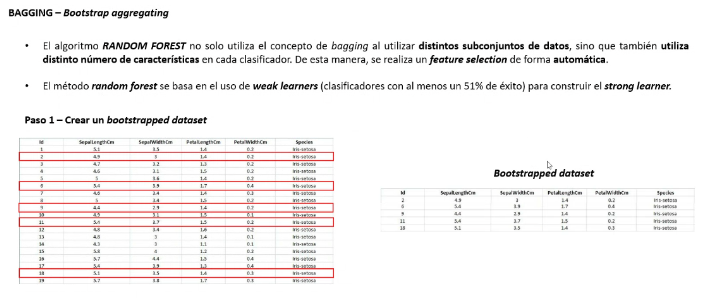

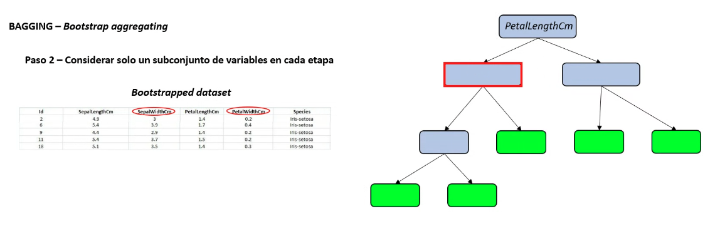

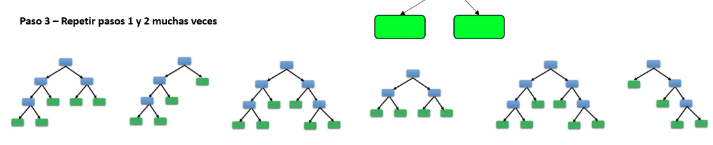

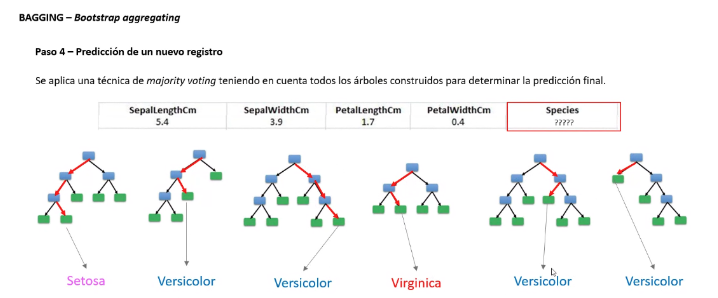

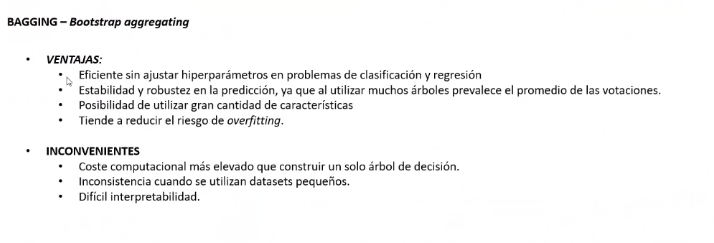

# Boosting - Adaboost

- Es una técnica de clasificación similar al método bagging, pero el entrenamiento se lleva a cabo en serie, en lugar de en paralelo.

- El algoritmo se entrena de manera iterativa dando más peso en cada iteración al error cometido durante la iteración anterior. Aquellos errores cometidos, se presentan muchas más veces en las siguientes muestras.

- La clasificación final se obtiene promediando los resultados de todos los clasificadoresde manera ponderada, a diferencia del método bagging.

- Esta técnica permite reducir la varianza y el sesgo (bias).

- Se puede usar cualquier clasificador, pero los más utilizados son los árboles dedecisión.

- El método más conocido dentro de las técnicas de boosting es el llamado Adaboost

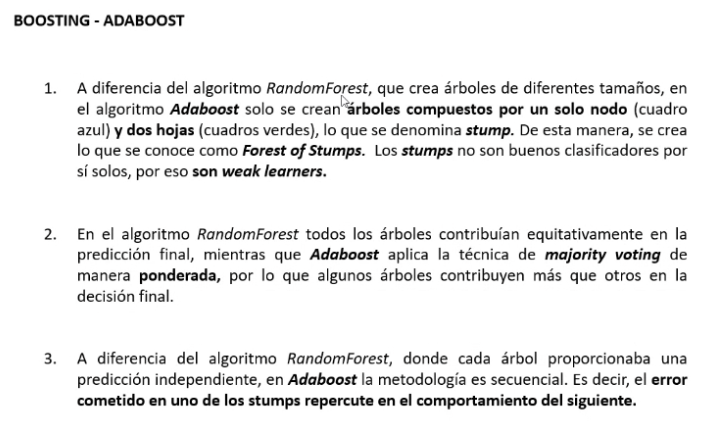

## Ejemplo

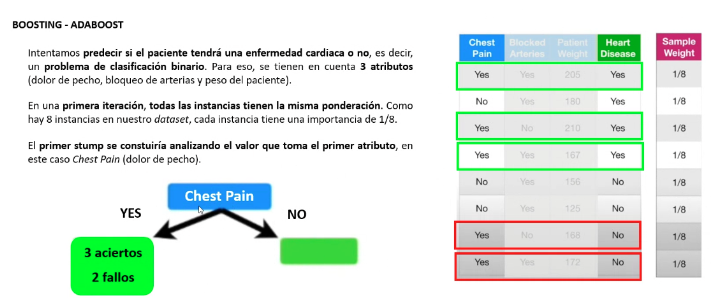

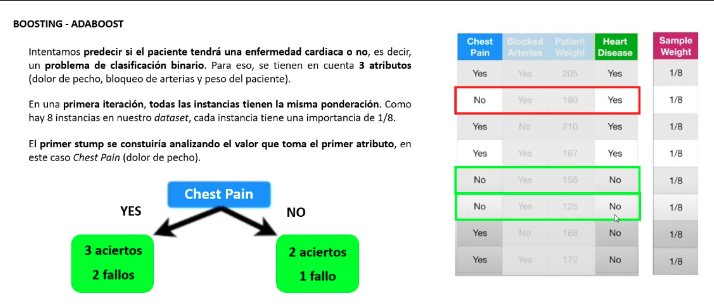

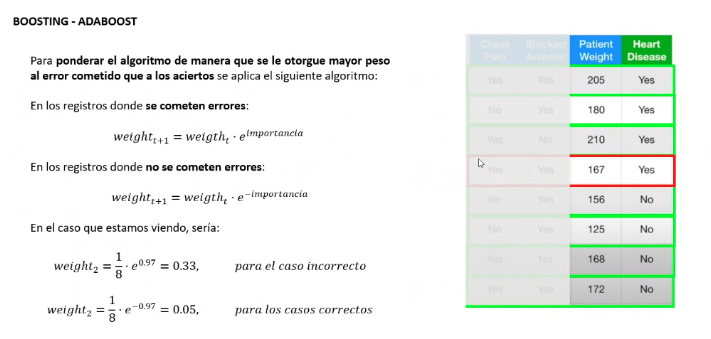

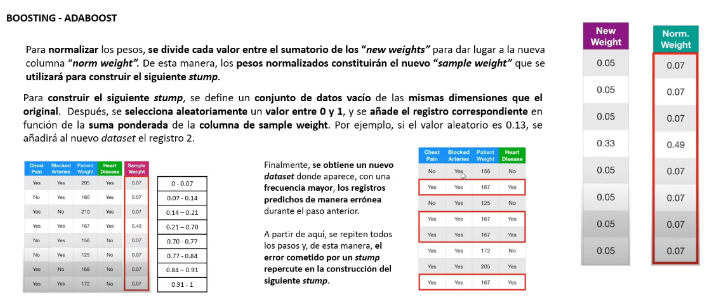

Lo que hago en base al `GINI`, tomo la variable de mayor valor y la pongo arriba en el árbol, y luego voy agregando los otros ítems debajo de la variable con mayor GINI. En este caso, tomo primero la de género y luego tomo el del aula o el de estatura.


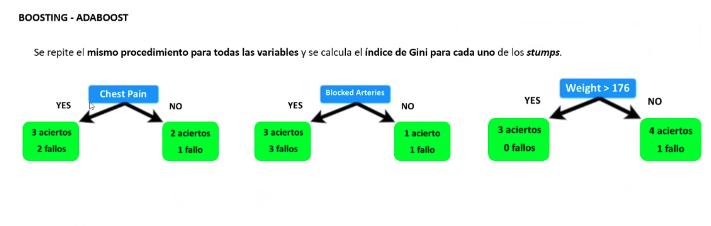

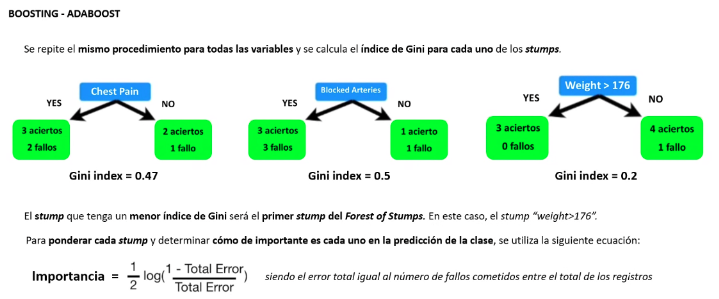

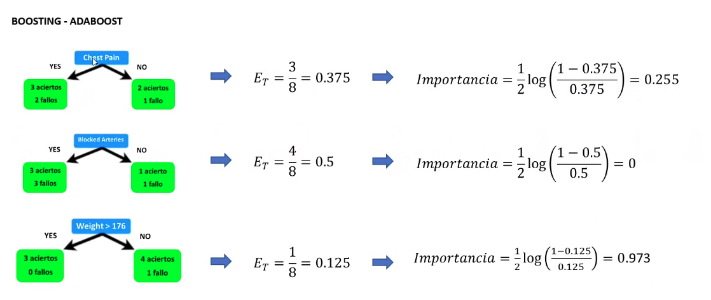

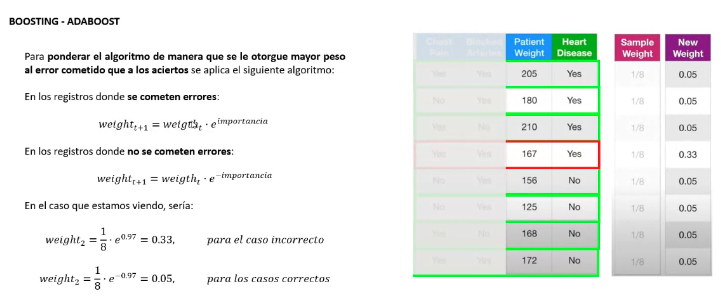

### Ventajas

- Fácil implementación.
- Permite corregir errores de manera iterativa usando weak classifiers.
- Mejora el rendimiento combinando weak learners.
- No produce overfitting.

### Desventajes
- Es sensible a datos ruidosos.
- Es poco robusto frente a outliers
- Es computacionalmente menos eficiente que otros algoritmos debido a su entrenamiento iterativo

Lo que hace finalmente, va corrigiendo el error de forma que llegue a un resultado donde pueda predecir los valores.

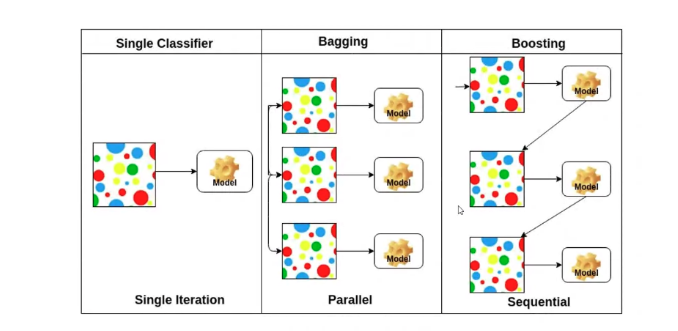
